## 밑바닥부터 시작하는 딥러닝(Deep Learning from Scratch) 챕터별 예제코드 정리 
예제코드가 기본이나 정확히 일치하지는 않습니다. 개인적으로 모든 코드들을 문서화하되 너무 기본적인 내용은 제외하거나 나름대로 더 필요하다고 생각되는 내용은 추가하였습니다. 같은 내용을 다른 방식으로 구현하는 경우도 있습니다.
## Chapter 3. 신경망
### 3.2 Activation function (활성화 함수)
### step function (계단함수)

In [41]:
import numpy as np
import matplotlib.pylab as plt

def step_function1(x): # 인수 x는 실수(부동소수점)만 받아들임
    if x > 0:
        return 1
    else:
        return 0
step_function1(3)

1

In [42]:
# 위의 step function은 주로 matrix 연산으로 이루어지는 neural network에서 numpy 배열을 처리하지 못하므로 아래와 같이 알맞게 수정해야함
def step_function2(x): # scalar, list, ndarray를 처리할수있도록 적히 수정
    tmp = np.array(x)
    tmp = tmp > 0
    return tmp.astype(np.int)
step_function2(np.array([1,-1,1]))

array([1, 0, 1])

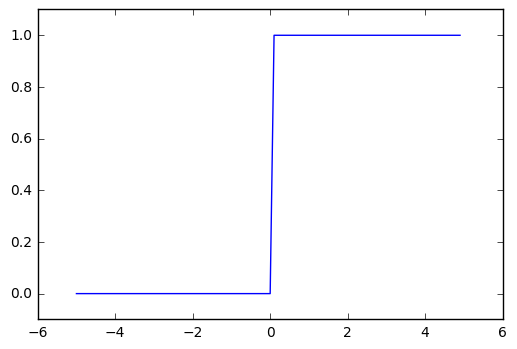

In [43]:
# step function 시각화
x = np.arange(-5 ,5, 0.1) # -5에서 5전까지 0.1간격의 ndarray 생성
y = step_function2(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위지정
plt.show()

### sigmoid function 

In [44]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.array([-1, -1, 2])
sigmoid(x)

array([ 0.26894142,  0.26894142,  0.88079708])

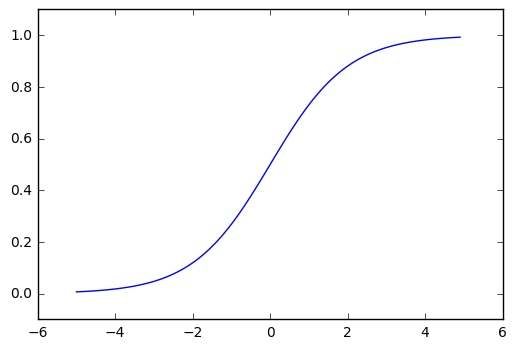

In [45]:
# sigmoid function 시각화
x = np.arange(-5 ,5, 0.1) # -5에서 5전까지 0.1간격의 ndarray 생성
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위지정
plt.show()

### step function vs sigmoid function 

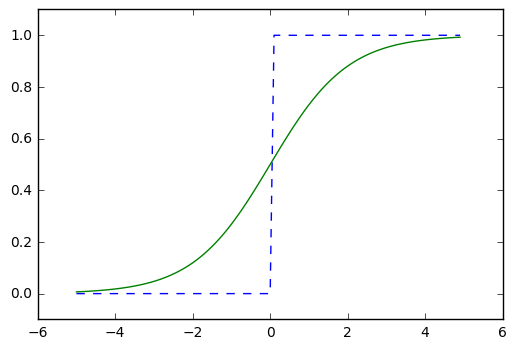

In [46]:
# sigmoid function과  step function 겹쳐그리기
y1 = step_function2(x)
y2 = sigmoid(x)
plt.plot(x, y1, linestyle = '--')
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)
plt.show()

### Rectified Linear unit (ReLu)

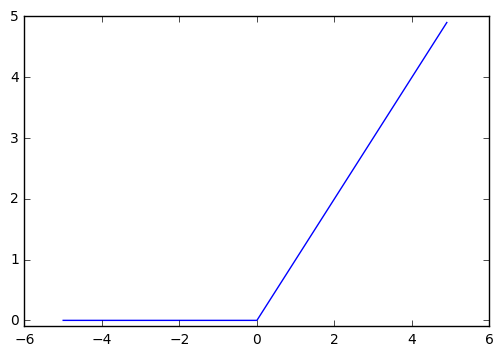

In [47]:
## Rectified Linear unit (Relu)
def relu(x):
    return np.maximum(0, x)

## Relu 시각화
y3 = relu(x)
plt.plot(x, y3)
plt.ylim(-0.1, 5)
plt.show()

### 3.3 다차원 배열의 계산 
### 2차원 input, 3차원 output 네트워크 forward

In [48]:
x = np.array([1,2])
print(x.shape)

W = np.array([[1,3,5], [2,4,6]])
print(W.shape)

h = np.dot(W.T, x)
h

(2,)
(2, 3)


array([ 5, 11, 17])

### 3.4 3층 신경망 구현
### hidden layer가 2개인 신경망의 forward 과정 구현 (회귀), (2,3,2,2) network

In [49]:
# first layer :  2차원 인풋 -> 3개의 hidden node, 활성함수로 sigmoid function
x = np.array([1, .5])
x.shape

W1 = np.array([[.1, .3, .5], [.2, .4, .6]])
W1.shape

B1 = np.array([.1, .2, .3])
B1.shape

pre_A1 = np.dot(W1.T, x) + B1 # activation function의 input
A1 = sigmoid(pre_A1)

In [50]:
# second layer : 3개의 hidden node -> 2개의 hidden node
W2 = np.array([[.1, .4], [.2, .5], [.3, .6]])
B2 = np.array([.1, .2])
pre_A2 = np.dot(W2.T, A1) + B2
A2 = sigmoid(pre_A2)

In [51]:
# second layer to output
def identity_function(x): # 출력층의 활성화함수 회귀문제라 identity function을 사용하고 분류문제이면 softmax를 활용할 것이다.
    return x
W3 = np.array([[.1, .3], [.2, .4]])
B3 = np.array([.1, .2])
pre_A3 = np.dot(W3.T, A2) + B3
y = identity_function(pre_A3)
y

array([ 0.31682708,  0.69627909])

### module 화 

In [52]:
def init_network():
    network = {} # 빈 dictionary 선언
    network['W1'] = np.array([[.1, .3, .5], [.2, .4, .6]]) # network라는 이름을 가진 dictionary instance에 W1을 key 값으로
                                                           # 첫번째 hidden layer와 input의 weight를 저장
    network['B1'] = np.array([.1, .2, .3]) # bias 저장
    network['W2'] = np.array([[.1, .4], [.2, .5], [.3, .6]])
    network['B2'] = np.array([.1, .2])
    network['W3'] = np.array([[.1, .3], [.2, .4]])
    network['B3'] = np.array([.1, .2])

    return network

def foward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']
    pre_A1 = np.dot(W1.T, x) + B1
    A1 = sigmoid(pre_A1)
    pre_A2 = np.dot(W2.T, A1) + B2
    A2 = sigmoid(pre_A2)
    pre_A3 = np.dot(W3.T, A2) + B3
    y = identity_function(pre_A3)
    return y

In [53]:
network = init_network()
x = np.array([1, .5])
y = foward(network, x)
y

array([ 0.31682708,  0.69627909])

### 3.5 출력층 설계하기
### output layer activation function 설계
### identity function (회귀문제의 경우)

In [54]:
def identity_function(x):
    return x

### softmax function (분류문제의 경우)

In [55]:
# 예제
a = np.array([.3, 2.9, 4])
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
y = exp_a / sum_exp_a
print(y, np.sum(y)) # 합은 항상 1이 된다.

[ 0.01821127  0.24519181  0.73659691] 1.0


In [56]:
# 함수화
def softmax1(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
# 위에서 구현한 sofmax1 function은 컴퓨터에서는 오버플로(너무 큰 값은 표현하지못함) 문제가 발생한다.
print(softmax1(np.array([1010, 1000, 990])))
print(np.exp(np.array([1010, 1000, 990]))) # 지수함수 걍 오버플로!

[ nan  nan  nan]
[ inf  inf  inf]


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in true_divide
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: overflow encountered in exp


In [38]:
# softmax function 내의 지수함수를 계산할 때 어떤 정수를 더해도(빼도) 결과는 바뀌지 않으므로 오버플로를 막기위해
# softmax function에 들어오는 input 값중 가장 큰 값을 C로 한다.
def softmax2(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y
print(softmax2(np.array([1010, 1000, 990])))
print(np.sum(softmax2(np.array([1010, 1000, 990]))))
# 분류문제에서 다 만든 모델을 활용할 때는 softmax function을 활용한 activation을 빼도되지만.
# 학습할때는 cross-entropy loss를 활용하므로 빼면 안된다!

[  9.99954600e-01   4.53978686e-05   2.06106005e-09]
1.0
